In [3]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #model 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #Save the model in HDD



Assumption of LR
Linearity: The relationship between X and  Y is linear.

Homoscedasticity: The variance of residual is the same for any value of X.

Normality: Residual Normally distributed


No multi Colinearity 

In [4]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
del data["Serial No."]

In [6]:
data.shape

(500, 8)

In [7]:
data.isnull().sum() #checkinh null values 

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          485 non-null    float64
 1   TOEFL Score        490 non-null    float64
 2   University Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

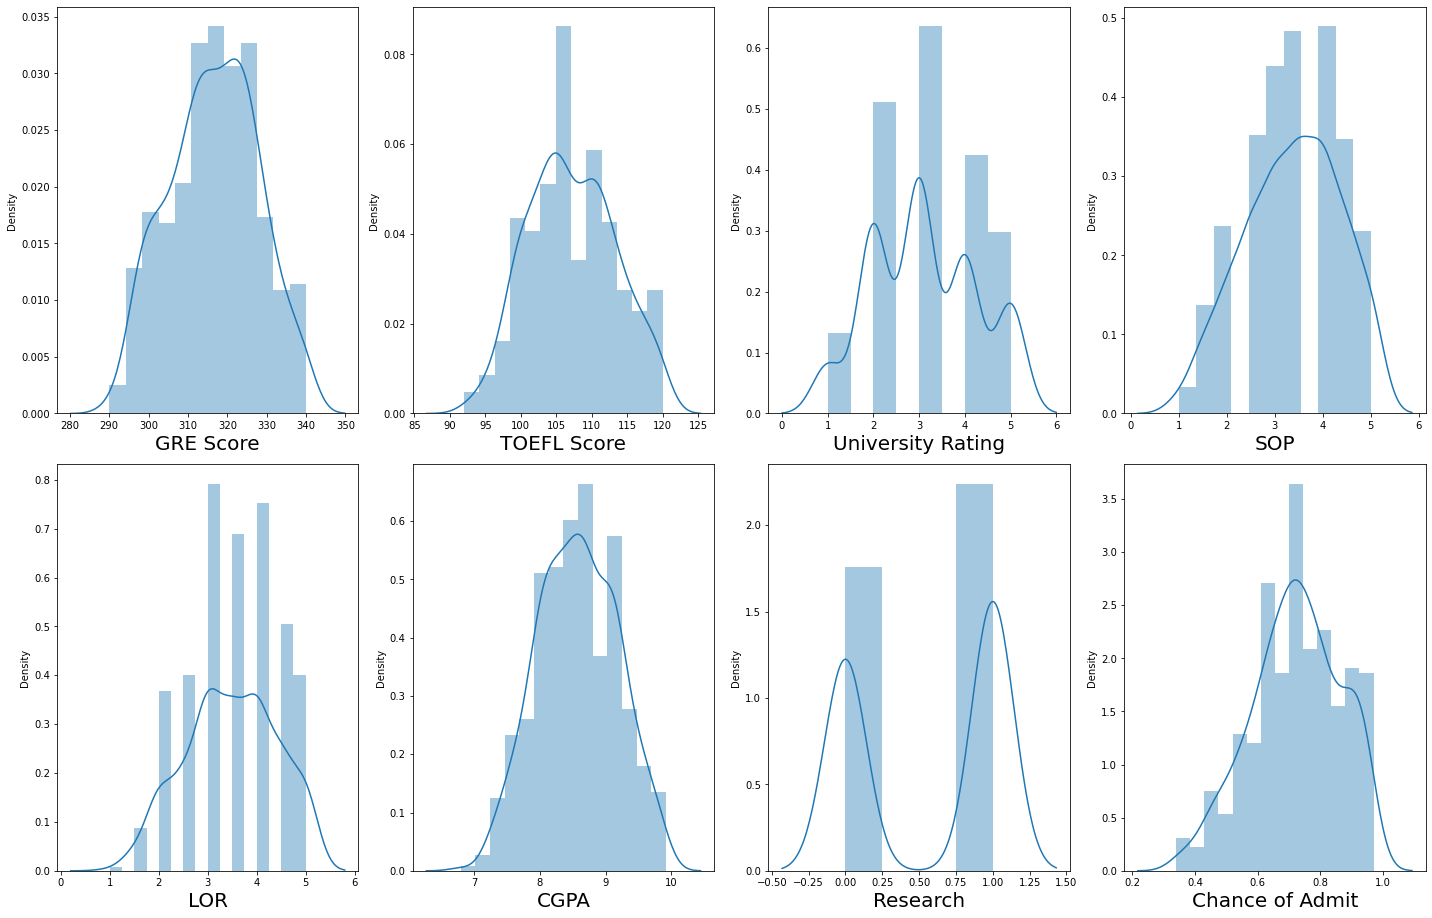

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

In [10]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])#filled null values with mode
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean()) #mean 
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean()) #mean

C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

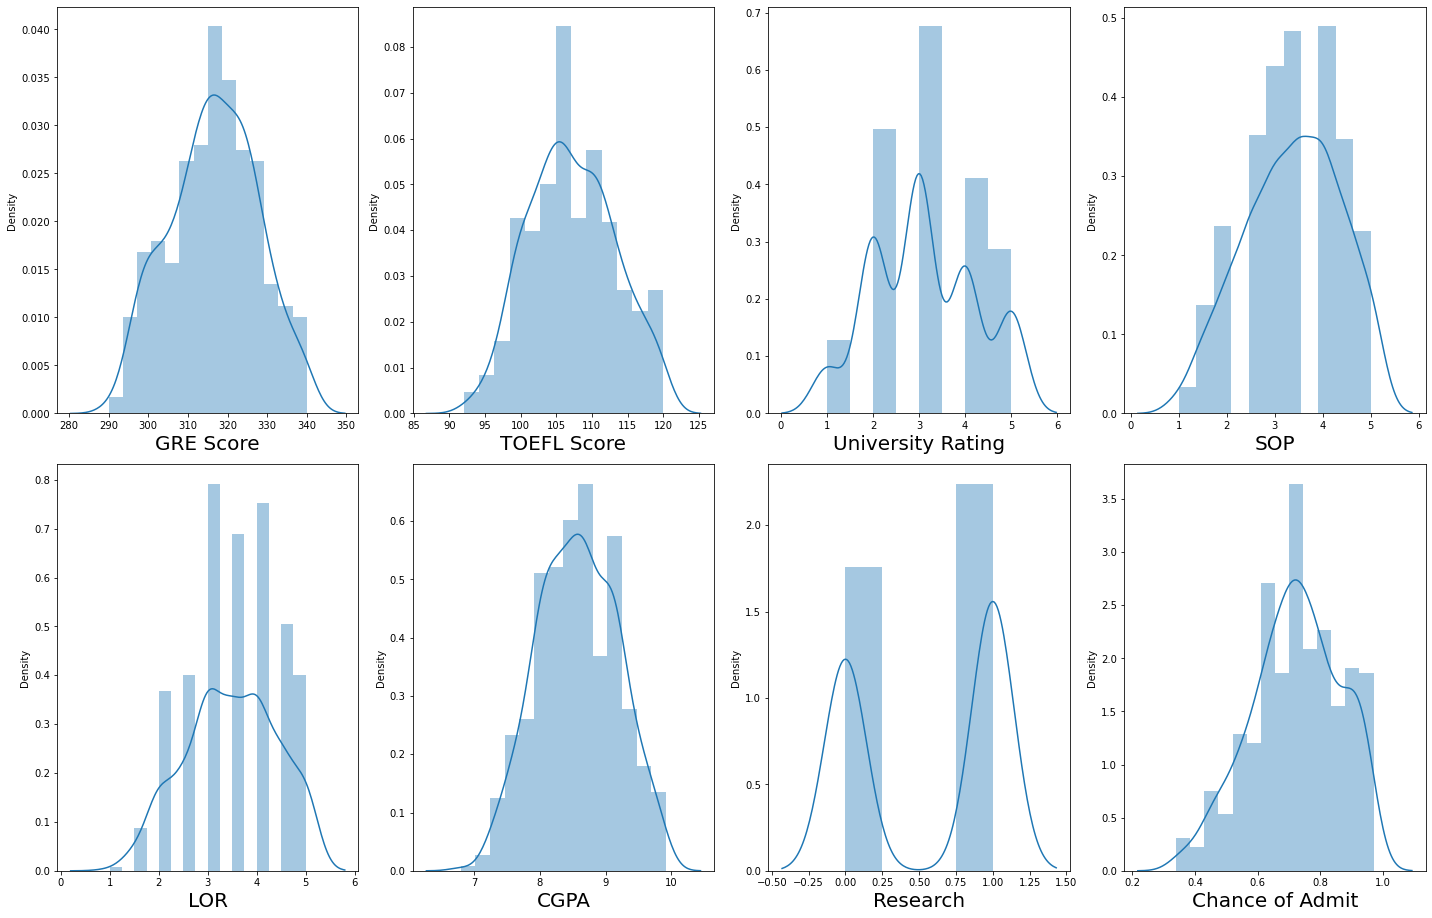

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

there is no skewness in data

In [12]:
y = data['Chance of Admit'] #predict / dependent variable 
X =data.drop(columns = ['Chance of Admit']) #independent variables data[["GRE Score","TOEFL Score",]]

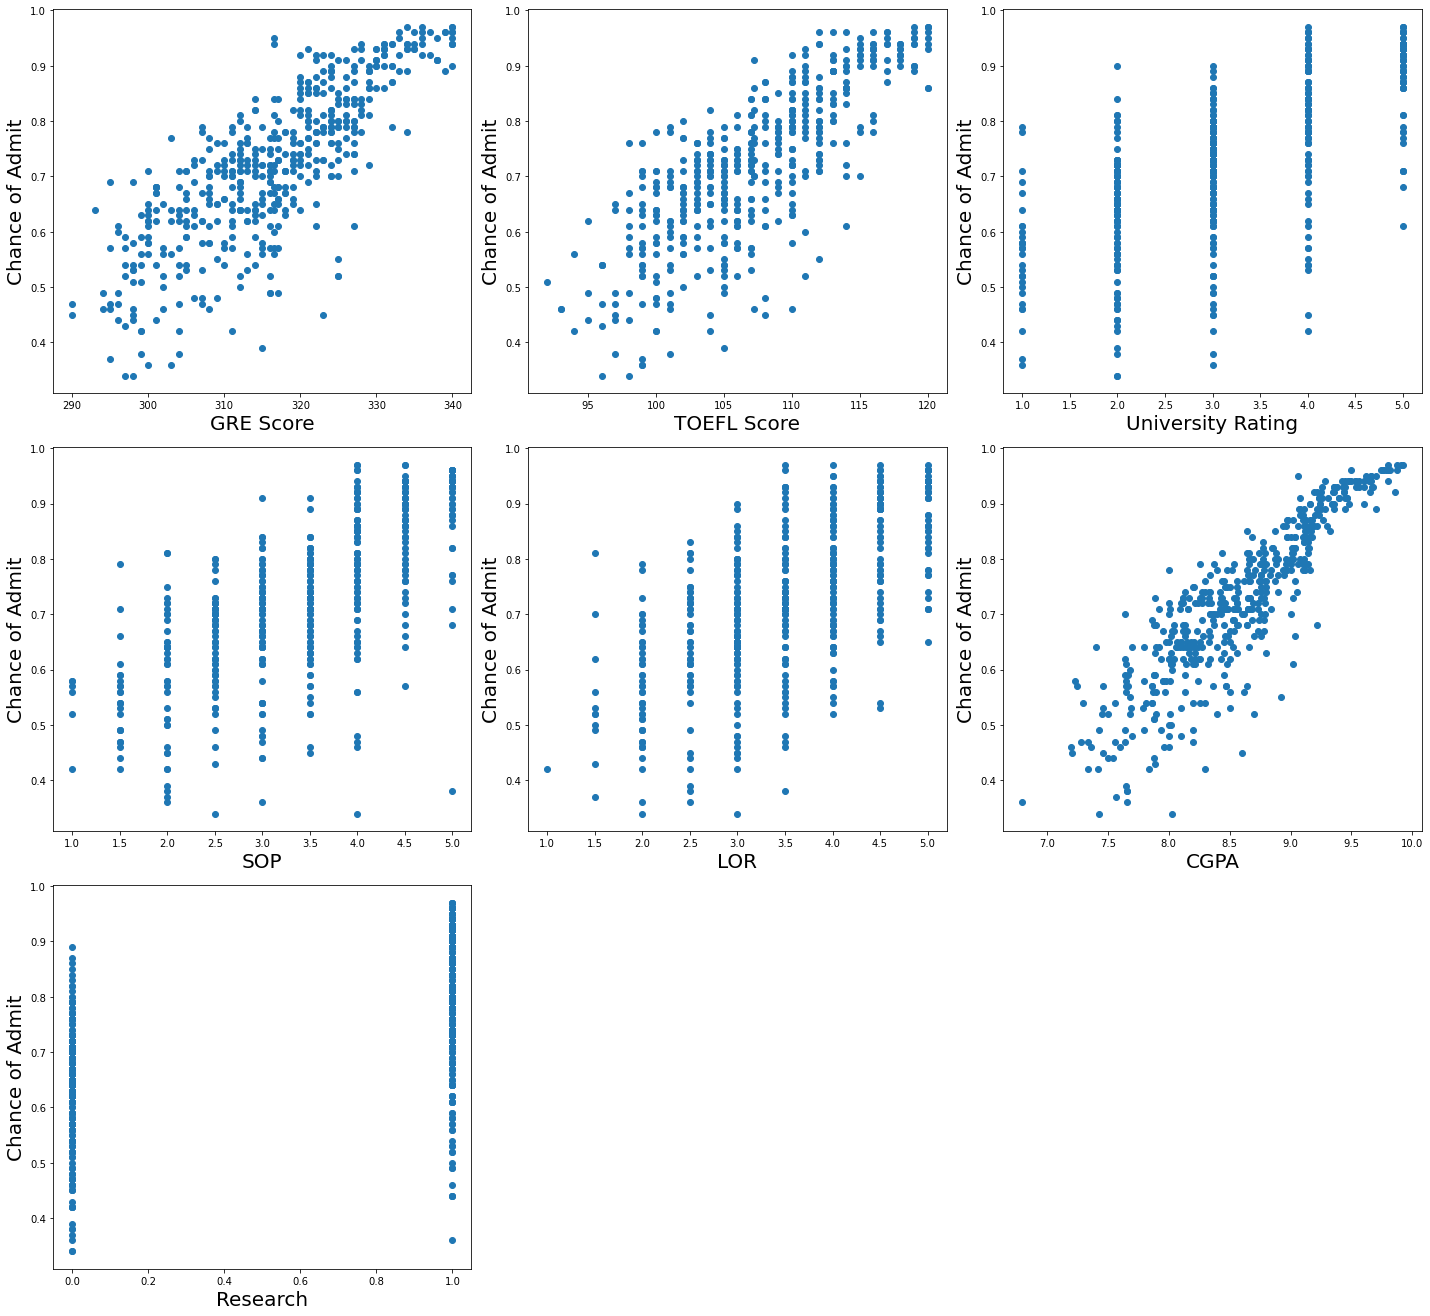

In [13]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [17]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [18]:
regression.score(x_train,y_train)## Training 

0.8415250484247909

In [19]:
regression.score(x_test,y_test)## Testing 

0.7534898831471064

In [20]:
predy=regression.predict(x_test)

In [21]:
r_squared=r2_score(y_test, predy)

In [22]:
r_squared

0.7534898831471064

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
mean_squared_error(y_test,predy)

0.004900961898621059

In [37]:
rmse=sqrt(mean_squared_error(y_test,predy))

In [38]:
rmse

0.07000687036727937

In [26]:
# Calculate Training MSE & RMSE

In [27]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [28]:
adjusted_r_squared

0.7499826253870043

In [39]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))  #final model for deployment

In [30]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [31]:
adjusted_r_squared

0.7499826253870043

In [32]:
r_squared

0.7534898831471064

# Regularization 

In [33]:
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

#Linear Regression 

In [34]:
regression.score(x_train,y_train) # R2 for training dataset 

0.8415250484247909

In [40]:
adj_r2(x_train,y_train,regression) #adjusted R2 for training dataset 

0.8385023654247188

2 score is 84.15% and adj r2 is 83.85% for our training dataset 

In [41]:
regression.score(x_test,y_test) #Test Accurtacy (r-Square value)

0.7534898831471064

In [42]:
adj_r2(x_test,y_test,regression) #Test Accurtacy (Adjusted r-Square value)

0.738741414617446

 R-Square score is 75.34% and adj R-Square is 73.87% for our Testing dataset

In [43]:
mean_squared_error(y_test,regression.predict(x_test))

0.004900961898621059

# Lasso Regression 

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300,1.1,0.9,0.8,0.7,0.5,0.4,0.3,0.2,0.33]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.004008326092510292




```
`# This is formatted as code`
```

Best alpha value is 0.00000001 & MSE is 0.00400

In [46]:
lasso_alpha=0.00000001

In [47]:
lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1e-08)

In [48]:
r2=lasso_reg.score(x_train,y_train)
print(r2)

0.8415250484247555


In [49]:
adj_r2(x_train,y_train,lasso_reg)

0.8385023654246827

In [50]:
adj_r2(x_test,y_test,lasso_reg)

0.7387414319520033

# Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,205]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.004008326161400834


In [57]:
Ridge_alpha= 0.000000000000001 #best alpha value

In [59]:
ridge_reg = Ridge(Ridge_alpha)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=1e-15)

In [60]:
r2=ridge_reg.score(x_train,y_train)
print(r2)

0.8415250484247909


In [61]:
adj_r2(x_train,y_train,ridge_reg)

0.8385023654247188

In [62]:
adj_r2(x_test,y_test,ridge_reg)

0.738741414617446

# Elastic net

In [63]:
from sklearn.linear_model  import  ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =5)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=5)

In [64]:
elastic_alpha=elasticCV.alpha_
elastic_alpha

0.001804089917929585

In [65]:
from sklearn.linear_model  import  ElasticNet
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.001804089917929585)

In [66]:
elasticnet_reg.score(x_train, y_train)

0.8414568885977638

In [67]:
elasticnet_reg.score(x_test, y_test)

0.7529467916407195

In [68]:
adj_r2(x_train,y_train,elasticnet_reg)

0.838432905546495

In [69]:
adj_r2(x_test, y_test,elasticnet_reg)

0.7381658304568309


 we can see by using different type of regularization, we still are getting the same MSE & r2 score. That means our  model has been well trained over the training data

In [ ]:
## Training    ## Test
LR 0.8385         0.7387    
L1 0.8385         0.7387  
L2 0.8385         0.7387
EN 0.8384         0.7381